In [72]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


def sigm(x):
    return 1/(1 + np.exp(-x))

def inv_sigm(x):
    return np.log(x/(1-x))

# GOAL see if there is a direct effect X1 -> Y when the reality is that there is not!

def generate_data(N, seed):
    np.random.seed(seed=seed)
    x1 = np.random.randn(N,1)
    x2 = np.random.randn(N,1)
    x3 = 2*x1 + 0.4*x2 + np.random.randn(N,1)
    Y = 0.5 + 0.0 * x1 + 0.5*x2 + 0.4*x3 + np.random.randn(N,1)
    X = np.concatenate([x1, x3, x2],1)
    return X, Y

In [120]:
# START WITH A CORRECTLY SPECIFIED MODEL

Ns = np.asarray([10, 20, 50, 80, 100, 140, 180, 200, 250, 300, 350, 400, 450, 500,
                 550, 600, 700, 800, 900, 1000, 1200, 1350, 1500])
num_inits = 500

counts = []
effect_sizes = []
for N in Ns:
    print('N', N)
    count = 0
    seed = 0
    effect_size = []
    for init in range(num_inits):
        seed += 1
        X, y = generate_data(N, seed=seed)

        mod = sm.OLS(y, sm.add_constant(X, prepend=False),1)

        res = mod.fit()

        x1_param = res.params[0]
        x1_pval = res.pvalues[0]
        effect_size.append(x1_param)
        if x1_pval < 0.05:
            count += 1
    effect_sizes.append(np.mean(effect_size))
    counts.append(count)
    
counts_correct = 100*np.asarray(counts)/num_inits
effect_sizes_correct = np.asarray(effect_sizes)
# MISSPECIFIED MODEL BY LEAVING OUT X2

effect_sizes = []
counts = []
for N in Ns:
    print('N', N)
    count = 0
    seed = 0
    effect_size = []
    for init in range(num_inits):
        seed += 1
        X, y = generate_data(N, seed=seed)

        mod = sm.OLS(y, sm.add_constant(X[:,:2], prepend=False),1)

        res = mod.fit()

        x1_param = res.params[0]
        x1_pval = res.pvalues[0]
        effect_size.append(x1_param)
        if x1_pval < 0.05:
            count += 1
    counts.append(count)
    effect_sizes.append(np.mean(effect_size))
counts_misspec = 100*np.asarray(counts)/num_inits
effect_sizes_misspec = np.asarray(effect_sizes)

N 10
N 20
N 50
N 80
N 100
N 140
N 180
N 200
N 250
N 300
N 350
N 400
N 450
N 500
N 550
N 600
N 700
N 800
N 900
N 1000
N 1200
N 1350
N 1500
N 10
N 20
N 50
N 80
N 100
N 140
N 180
N 200
N 250
N 300
N 350
N 400
N 450
N 500
N 550
N 600
N 700
N 800
N 900
N 1000
N 1200
N 1350
N 1500


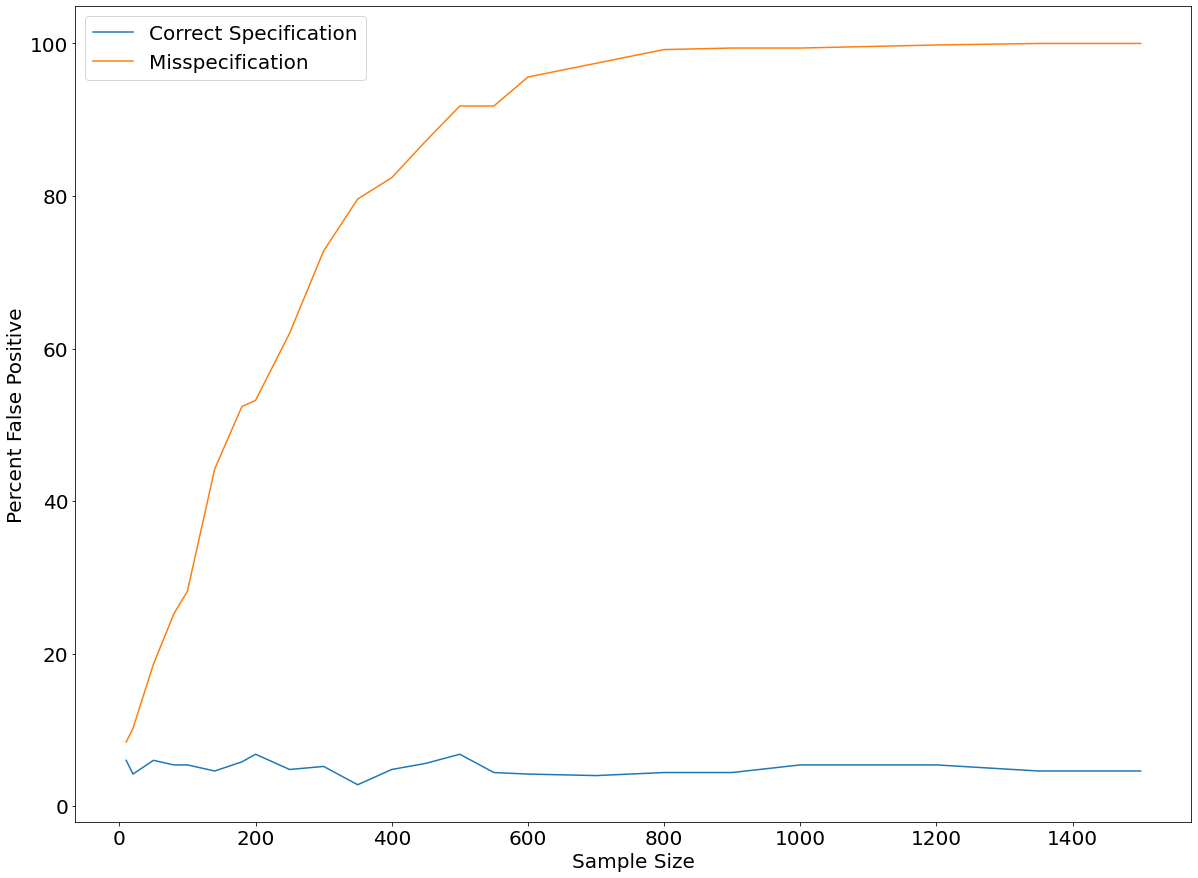

In [116]:
plt.figure(figsize=(20,15))
plt.plot(Ns,counts_correct, label='Correct Specification')
plt.plot(Ns, counts_misspec, label='Misspecification')
plt.ylabel('Percent False Positive', fontsize=20)
plt.xlabel('Sample Size', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('type_1_error_rate_misspecification.png')
plt.show()

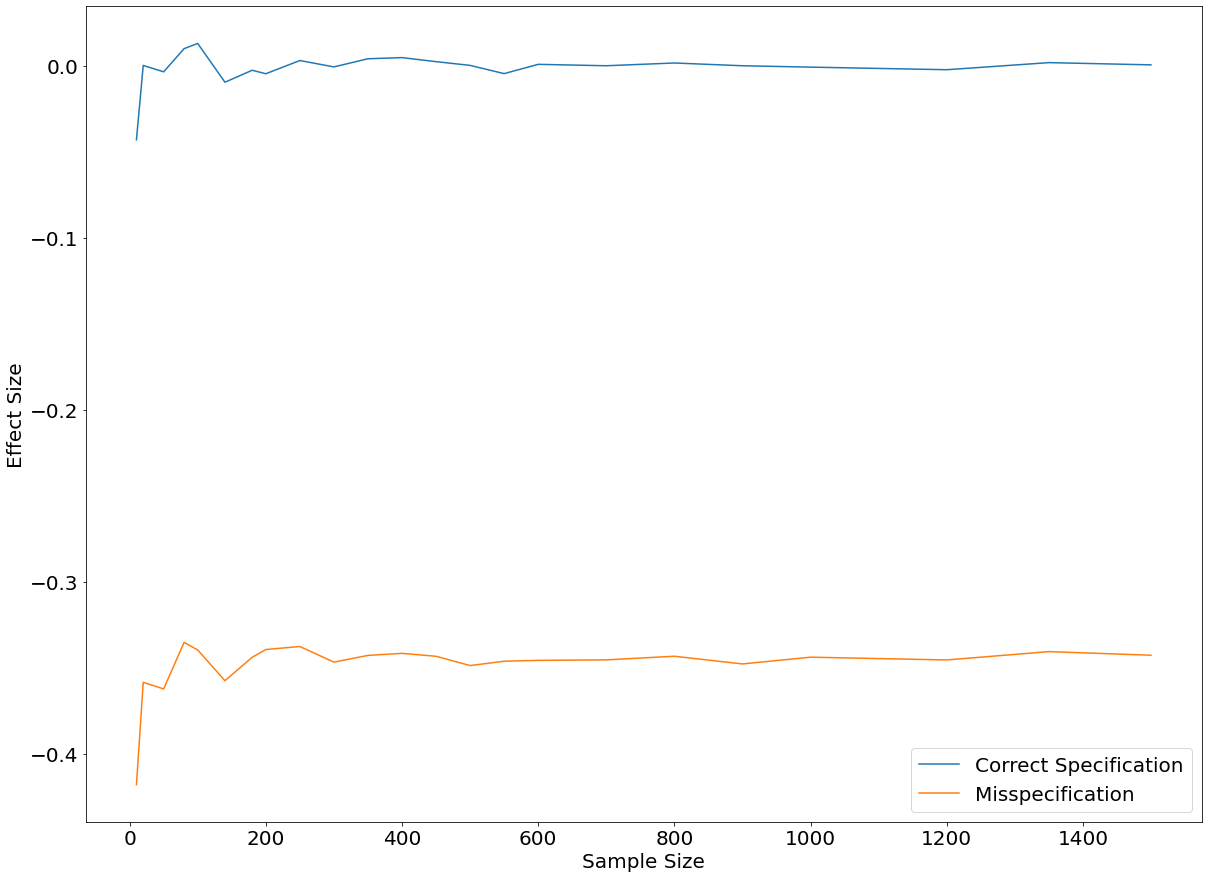

In [121]:
plt.figure(figsize=(20,15))
plt.plot(Ns, effect_sizes_correct, label='Correct Specification')
plt.plot(Ns, effect_sizes_misspec, label='Misspecification')
plt.ylabel('Effect Size', fontsize=20)
plt.xlabel('Sample Size', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('effect_size_null_effect_misspecification.png')
plt.show()